## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [31]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,equal_AMT_INCOME_TOTAL
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,1,0,1,0,False,"(-91324.35, 11723085.0]"
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,1,0,False,"(-91324.35, 11723085.0]"
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"
5,100008,0,0,0,1,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"
6,100009,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"
7,100010,0,0,1,1,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"
8,100011,0,0,0,1,0,112500.0,1019610.0,33826.5,913500.0,...,0,0,0,0,0,0,0,0,True,"(-91324.35, 11723085.0]"
9,100012,0,1,0,1,0,135000.0,405000.0,20250.0,405000.0,...,0,0,0,0,0,0,0,0,False,"(-91324.35, 11723085.0]"


In [25]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=244)

In [33]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

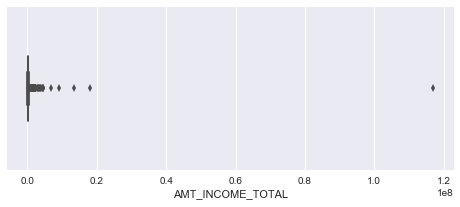

In [68]:
plt.figure(figsize=(8, 3))
sns.boxplot(app_train['AMT_INCOME_TOTAL'], width=0.4)

In [3]:
income = app_train[['TARGET', 'AMT_INCOME_TOTAL']].copy()

income["INCOME_bin"] = pd.qcut(income["AMT_INCOME_TOTAL"], q=10)
income = income.sort_values(by='INCOME_bin')
income_grouped  = income.groupby("INCOME_bin").mean()
income_grouped
#income = app_train['AMT_INCOME_TOTAL']
#income = income.sort_values(by='Income_bin')

,TARGET,AMT_INCOME_TOTAL
INCOME_bin,,
"(25649.999, 81000.0]",0.081908,66254.124685
"(81000.0, 99000.0]",0.082232,91089.278813
"(99000.0, 112500.0]",0.087192,111333.276330
"(112500.0, 135000.0]",0.084894,131852.488657
"(135000.0, 147150.0]",0.090007,142953.056026
"(147150.0, 162000.0]",0.086407,157141.512098
"(162000.0, 180000.0]",0.084224,178061.632269
"(180000.0, 225000.0]",0.078065,212733.495347
"(225000.0, 270000.0]",0.070401,259491.085277


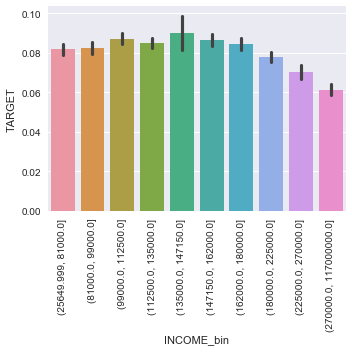

In [12]:
g = sns.catplot(x="INCOME_bin",y='TARGET',kind='bar',data=income)
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()